In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DataCollection and processing

In [2]:
gold_data=pd.read_csv(r'/content/gld_price_data.csv')

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


For Correlation

In [10]:
data=gold_data.drop(['Date'],axis=1)

In [11]:
data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
correlation=data.corr()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

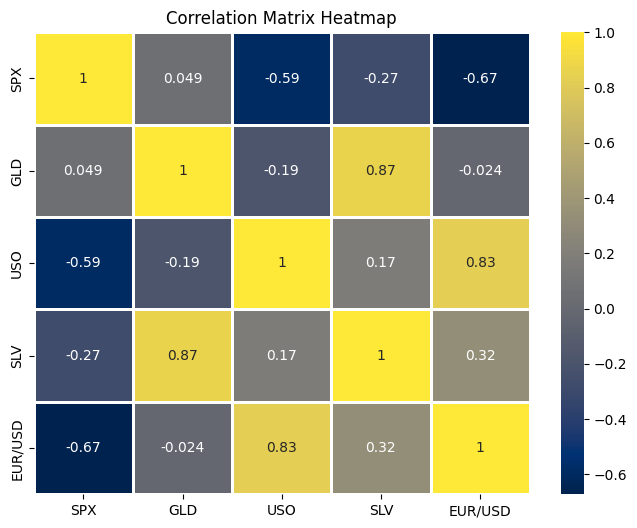

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True, cmap='cividis',linewidth=0.8)
plt.title("Correlation Matrix Heatmap")

<ipython-input-17-8ab7873dbdbf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='pink')


<Axes: xlabel='GLD', ylabel='Density'>

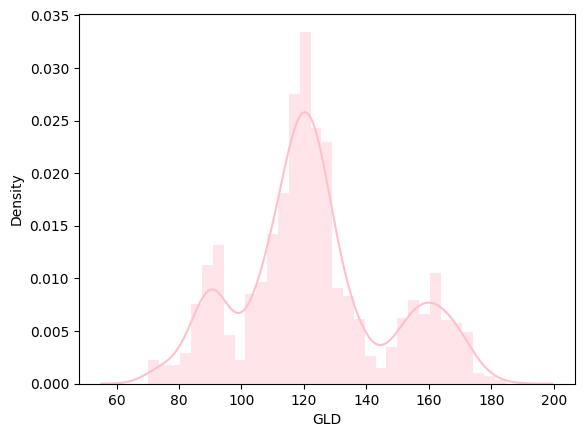

In [17]:
sns.distplot(gold_data['GLD'],color='pink')

Splitting the features and the target

In [18]:
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

Model Training using Random Forest Regressor

In [20]:
regressor=RandomForestRegressor()

In [21]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
test_data_prediction=regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[169.07409961  82.02669993 116.03170033 127.7236005  120.69700148
 154.68569749 150.23139858 125.8738     117.42879886 125.99370124
 116.7198009  171.87440124 141.30779792 167.89809856 115.28009979
 117.1148004  139.80010317 170.19280083 159.88270406 160.25550038
 155.16620051 125.26069995 176.26319954 156.66340335 125.15910042
  93.78259984  78.46300015 120.72080008 119.20099964 167.46460051
  88.18050041 125.03079989  91.06990048 117.75180033 121.26539897
 136.60010092 115.42020172 115.31450068 148.08310012 107.26430099
 104.26640238  87.25549805 126.57400009 117.88050049 153.34279894
 119.63080009 108.41009978 107.83329783  93.16960035 127.2309975
  74.92460036 113.55439898 121.68930025 111.34599893 118.80449882
 120.85699991 158.41590093 166.39350154 147.17659728  85.78929864
  94.44860027  86.85899867  90.58150057 119.11030078 126.52430061
 127.63100049 169.10640012 122.17589945 117.26719911  98.73280033
 167.72779992 143.57599887 132.21060205 121.07420224 120.91169945
 119.707100

In [25]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.9892595775807331


Comparing actual values and the predicted values

In [26]:
y_test=list(y_test)

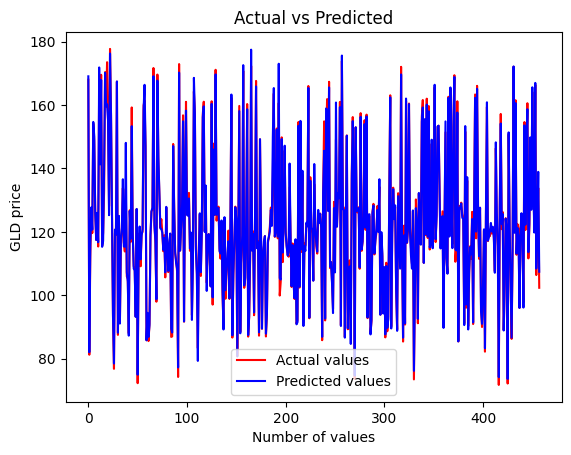

In [28]:
plt.plot(y_test,color='red',label='Actual values')
plt.plot(test_data_prediction,color='blue',label='Predicted values')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()